<h2 align="center">Data Science Fundamentals CSE 519</h2>
<h2 align="center">Prof. Steven Skiena</h2>
<h2 align="center">Homework 2</h2>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import os
import random
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import xgboost as xgb
import requests
import json

### Checking files in working directory

In [2]:
print(os.listdir('D:/PycharmProjects/DSF Assignment 2/'))

['.ipynb_checkpoints', 'ensemble_submission_1.csv', 'ensemble_submission_2.csv', 'ensemble_submission_3.csv', 'Final-Copy1.ipynb', 'Final.ipynb', 'GCP-Coupons-Instructions.rtf', 'lgbm_submission_1.csv', 'lgbm_submission_2.csv', 'linear_regression_submission.csv', 'linear_regression_submission_2.csv', 'linear_regression_submission_3.csv', 'linear_regression_submission_4.csv', 'LR_1.PNG', 'LR_2.PNG', 'random_forest_submission_1.csv', 'random_forest_submission_2.csv', 'random_forest_submission_3.csv', 'RF_1.PNG', 'RF_2.PNG', 'sample_submission.csv', 'scatter_e_f.png', 'solution.ipynb', 'test.csv', 'train.csv', 'train_duration.csv', 'xgboost_submission_1.csv', 'xgboost_submission_2.csv', 'xgboost_submission_3.csv', 'XGB_2.PNG']


### Loading Training data by using random sampling (2% data is used)

In [3]:
f = 'D:/PycharmProjects/DSF Assignment 2/train.csv'
n = sum(1 for line in open(f))
sample = (int)(n / 50)
skip = random.sample(range(1,n), n-sample)
train_df = pd.read_csv(f, skiprows=skip)
print(train_df.dtypes)

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


### Loading Testing data

In [4]:
test_df = pd.read_csv('D:/PycharmProjects/DSF Assignment 2/test.csv')
print(test_df.dtypes)

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


### Checking shapes of train and test datasets

In [5]:
print(train_df.shape)
print(test_df.shape)

(1108476, 8)
(9914, 7)


### Checking null values in Training data

In [6]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
dtype: int64

### Checking null values in Testing data

In [7]:
test_df.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Removing null values from Training data

In [8]:
train_df = train_df.dropna()
train_df.shape

(1108471, 8)

### Looking at stats of fare amount

In [9]:
train_df['fare_amount'].describe()

count    1.108471e+06
mean     1.134554e+01
std      9.777262e+00
min     -7.500000e+01
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      5.500000e+02
Name: fare_amount, dtype: float64

### Removing negative and zero fare amounts

In [10]:
train_df = train_df.drop(train_df[train_df['fare_amount'] <= 0].index)
train_df.shape

(1108409, 8)

### Looking at stats of passenger count in training data

In [11]:
train_df['passenger_count'].describe()

count    1.108409e+06
mean     1.685162e+00
std      1.308862e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.000000e+00
Name: passenger_count, dtype: float64

### Looking at stats of passenger count in test data

In [12]:
test_df['passenger_count'].describe()

count    9914.000000
mean        1.671273
std         1.278747
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

### Removing entries with less than 1 and more than 6 passenger count

In [13]:
train_df = train_df.drop(train_df[train_df['passenger_count'] > 6].index)
train_df = train_df.drop(train_df[train_df['passenger_count'] < 1].index)
train_df.shape

(1104519, 8)

### Looking at the max and min values of latitude and longitude

In [14]:
test_df['dropoff_latitude'].describe()

count    9914.000000
mean       40.751743
std         0.035435
min        40.568973
25%        40.735254
50%        40.754065
75%        40.768757
max        41.696683
Name: dropoff_latitude, dtype: float64

In [15]:
test_df['pickup_latitude'].describe()

count    9914.000000
mean       40.751041
std         0.033541
min        40.573143
25%        40.736125
50%        40.753051
75%        40.767113
max        41.709555
Name: pickup_latitude, dtype: float64

In [16]:
test_df['dropoff_longitude'].describe()

count    9914.000000
mean      -73.973657
std         0.039072
min       -74.263242
25%       -73.991247
50%       -73.980015
75%       -73.964059
max       -72.990963
Name: dropoff_longitude, dtype: float64

In [17]:
test_df['pickup_longitude'].describe()

count    9914.000000
mean      -73.974722
std         0.042774
min       -74.252193
25%       -73.992501
50%       -73.982326
75%       -73.968013
max       -72.986532
Name: pickup_longitude, dtype: float64

### Rounding off the lat, long values upto 4 decimals

In [18]:
train_df.head()
train_df['pickup_longitude'] = train_df['pickup_longitude'].round(4)
train_df['pickup_latitude'] = train_df['pickup_latitude'].round(4)
train_df['dropoff_longitude'] = train_df['dropoff_longitude'].round(4)
train_df['dropoff_latitude'] = train_df['dropoff_latitude'].round(4)

### Determined the max and min longitude and latitude by looking at the test set properties

In [19]:
train_df = train_df.drop(((train_df[train_df['dropoff_latitude'] > 41.69])).index)
train_df = train_df.drop(((train_df[train_df['dropoff_latitude'] < 40.56])).index)

train_df = train_df.drop(((train_df[train_df['pickup_latitude'] > 41.71])).index)
train_df = train_df.drop(((train_df[train_df['pickup_latitude'] < 40.57])).index)

train_df = train_df.drop(((train_df[train_df['dropoff_longitude'] > -72.99])).index)
train_df = train_df.drop(((train_df[train_df['dropoff_longitude'] < -74.26])).index)

train_df = train_df.drop(((train_df[train_df['pickup_longitude'] > -72.98])).index)
train_df = train_df.drop(((train_df[train_df['pickup_longitude'] < -74.25])).index)

train_df.shape

(1081003, 8)

### Calculating euclidean distance in km for training set

In [20]:
# Reference for formula - https://math.stackexchange.com/questions/29157/how-do-i-convert-the-distance-between-two-lat-long-points-into-feet-meters

train_df['longitude_difference'] = (train_df['pickup_longitude'] - train_df['dropoff_longitude']).abs()
train_df['latitude_difference'] = (train_df['pickup_latitude'] - train_df['dropoff_latitude']).abs()
theta = (train_df['pickup_latitude'] + train_df['dropoff_latitude'])/2
print(theta.shape)
c = []
for i in theta:
    c.append(np.power(math.cos(np.radians(i)),2))
train_df['euclidean_distance'] = (np.sqrt(c*np.power(np.radians(train_df['longitude_difference']),2) + np.power(np.radians(train_df['latitude_difference']),2)))*6371

(1081003,)


### Rounding off the lat diff, long diff and distance values upto 4 decimals

In [21]:
train_df['longitude_difference'] = train_df['longitude_difference'].round(4)
train_df['latitude_difference'] = train_df['latitude_difference'].round(4)
train_df['euclidean_distance'] = train_df['euclidean_distance'].round(4)

In [22]:
print(train_df.head())

                             key  fare_amount          pickup_datetime  \
0  2010-06-04 14:49:00.000000100          5.7  2010-06-04 14:49:00 UTC   
1  2012-12-06 18:05:00.000000201         35.0  2012-12-06 18:05:00 UTC   
2    2014-07-20 12:48:35.0000001         17.0  2014-07-20 12:48:35 UTC   
3    2013-05-10 16:39:08.0000001          5.0  2013-05-10 16:39:08 UTC   
4   2010-05-17 07:44:00.00000096         17.3  2010-05-17 07:44:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0          -73.9935          40.7614           -73.9797           40.7596   
1          -73.9533          40.7878           -73.9444           40.7198   
2          -73.9734          40.7439           -73.9540           40.7661   
3          -73.9717          40.7634           -73.9620           40.7766   
4          -73.9510          40.7856           -74.0102           40.7203   

   passenger_count  longitude_difference  latitude_difference  \
0                5         

### Extracting date and time using pandas function

In [23]:
train_df['pickup_datetime']  = pd.to_datetime(train_df['pickup_datetime'])
train_df.dtypes

key                             object
fare_amount                    float64
pickup_datetime         datetime64[ns]
pickup_longitude               float64
pickup_latitude                float64
dropoff_longitude              float64
dropoff_latitude               float64
passenger_count                  int64
longitude_difference           float64
latitude_difference            float64
euclidean_distance             float64
dtype: object

### Getting specific individual values of hour, day, date, month and year from 'pickup_datetime' 

In [24]:
train_df['Hour'] = train_df['pickup_datetime'].dt.hour
train_df['DayofWeek'] = train_df['pickup_datetime'].dt.dayofweek
train_df['Date'] = train_df['pickup_datetime'].dt.day
train_df['Month'] = train_df['pickup_datetime'].dt.month
train_df['Year'] = train_df['pickup_datetime'].dt.year

### Most of the taxi rides are to and from the airport. If the pickup or dropoff location are within 1km from the airport, we assume they are travelling to or from the airport. Value of 1 is set if passenger is travelling to a particular airport.

In [25]:
jfk_lat = 40.6413
jfk_long = -73.7781

lga_lat = 40.7769
lga_long = -73.8740

ewr_lat = 40.6895
ewr_long = -74.1745

jfk = []
for index, row in train_df.iterrows():
    if((row['pickup_latitude'] - jfk_lat < 0.01 and row['pickup_longitude'] - jfk_long < 0.01) or (row['dropoff_latitude'] - jfk_lat < 0.01 and row['dropoff_longitude'] - jfk_long < 0.01)) :
        jfk.append(1)
    else:
        jfk.append(0)
    
train_df['JFK'] = jfk

lga = []
for index, row in train_df.iterrows():
    if((row['pickup_latitude'] - lga_lat < 0.01 and row['pickup_longitude'] - lga_long < 0.01) or (row['dropoff_latitude'] - lga_lat < 0.01 and row['dropoff_longitude'] - lga_long < 0.01)) :
        lga.append(1)
    else:
        lga.append(0)

train_df['LGA'] = lga

ewr = []
for index, row in train_df.iterrows():
    if((row['pickup_latitude'] - ewr_lat < 0.01 and row['pickup_longitude'] - ewr_long < 0.01) or (row['dropoff_latitude'] - ewr_lat < 0.01 and row['dropoff_longitude'] - ewr_long < 0.01)) :
        ewr.append(1)
    else:
        ewr.append(0)

train_df['EWR'] = ewr

In [26]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_difference,latitude_difference,euclidean_distance,Hour,DayofWeek,Date,Month,Year,JFK,LGA,EWR
0,2010-06-04 14:49:00.000000100,5.7,2010-06-04 14:49:00,-73.9935,40.7614,-73.9797,40.7596,5,0.0138,0.0018,1.1794,14,4,4,6,2010,0,1,0
1,2012-12-06 18:05:00.000000201,35.0,2012-12-06 18:05:00,-73.9533,40.7878,-73.9444,40.7198,2,0.0089,0.0680,7.5983,18,3,6,12,2012,0,1,0
2,2014-07-20 12:48:35.0000001,17.0,2014-07-20 12:48:35,-73.9734,40.7439,-73.9540,40.7661,1,0.0194,0.0222,2.9604,12,6,20,7,2014,0,1,0
3,2013-05-10 16:39:08.0000001,5.0,2013-05-10 16:39:08,-73.9717,40.7634,-73.9620,40.7766,1,0.0097,0.0132,1.6798,16,4,10,5,2013,0,1,0
4,2010-05-17 07:44:00.00000096,17.3,2010-05-17 07:44:00,-73.9510,40.7856,-74.0102,40.7203,1,0.0592,0.0653,8.8085,7,0,17,5,2010,0,1,0


### Using external OSRM API for getting the travel duration for each ride.

In [27]:
def get_duration(lat1, long1, lat2, long2):
    lat1 = str(lat1)
    long1 = str(long1)
    lat2 = str(lat2)
    long2 = str(long2)
    r = requests.get('http://router.project-osrm.org/route/v1/driving/%s,%s;%s,%s' %(long1,lat1,long2,lat2))
    try:
        output = r.json()
        for i in output['routes']:
            duration = i['duration']
    except:
        duration = 0
    return duration

In [28]:
duration = []
for index, row in train_df.iterrows():
    duration.append(get_duration(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']))

train_df['Duration'] = duration

### Rounding off the lat and long values of test set upto 4 decimals

In [29]:
test_df.head()
test_df['pickup_longitude'] = test_df['pickup_longitude'].round(4)
test_df['pickup_latitude'] = test_df['pickup_latitude'].round(4)
test_df['dropoff_longitude'] = test_df['dropoff_longitude'].round(4)
test_df['dropoff_latitude'] = test_df['dropoff_latitude'].round(4)

### Calculating euclidean distance in km for test set

In [30]:
# Reference for formula - https://math.stackexchange.com/questions/29157/how-do-i-convert-the-distance-between-two-lat-long-points-into-feet-meters

test_df['longitude_difference'] = (test_df['pickup_longitude'] - test_df['dropoff_longitude']).abs()
test_df['latitude_difference'] = (test_df['pickup_latitude'] - test_df['dropoff_latitude']).abs()
theta = (test_df['pickup_latitude'] + test_df['dropoff_latitude'])/2
print(theta.shape)
c = []
for i in theta:
    c.append(np.power(math.cos(np.radians(i)),2))
test_df['euclidean_distance'] = (np.sqrt(c*np.power(np.radians(test_df['longitude_difference']),2) + np.power(np.radians(test_df['latitude_difference']),2)))*6371

(9914,)


### Rounding off the lat diff, long diff and distance values of test set upto 4 decimals

In [31]:
test_df['longitude_difference'] = test_df['longitude_difference'].round(4)
test_df['latitude_difference'] = test_df['latitude_difference'].round(4)
test_df['euclidean_distance'] = test_df['euclidean_distance'].round(4)

### Extracting date and time of test set using pandas function

In [32]:
test_df['pickup_datetime']  = pd.to_datetime(test_df['pickup_datetime'])
test_df.dtypes

key                             object
pickup_datetime         datetime64[ns]
pickup_longitude               float64
pickup_latitude                float64
dropoff_longitude              float64
dropoff_latitude               float64
passenger_count                  int64
longitude_difference           float64
latitude_difference            float64
euclidean_distance             float64
dtype: object

### Getting specific individual values of test set - hour, day, date, month and year from 'pickup_datetime'

In [33]:
test_df['Hour'] = test_df['pickup_datetime'].dt.hour
test_df['DayofWeek'] = test_df['pickup_datetime'].dt.dayofweek
test_df['Date'] = test_df['pickup_datetime'].dt.day
test_df['Month'] = test_df['pickup_datetime'].dt.month
test_df['Year'] = test_df['pickup_datetime'].dt.year

In [34]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_difference,latitude_difference,euclidean_distance,Hour,DayofWeek,Date,Month,Year
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.9733,40.7638,-73.9814,40.7438,1,0.0081,0.0200,2.3262,13,1,27,1,2015
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.9869,40.7194,-73.9989,40.7392,1,0.0120,0.0198,2.4228,13,1,27,1,2015
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.9825,40.7513,-73.9797,40.7461,1,0.0028,0.0052,0.6245,11,5,8,10,2011
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.9812,40.7678,-73.9904,40.7516,1,0.0092,0.0162,1.9609,21,5,1,12,2012
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.9660,40.7898,-73.9886,40.7444,1,0.0226,0.0454,5.3951,21,5,1,12,2012


### Most of the taxi rides are to and from the airport. If the pickup or dropoff location are within 1km from the airport, we assume they are travelling to or from the airport. A value of 1 is set if passenger is travelling to a particular airport. (For Test Set)

In [35]:
jfk_lat = 40.6413
jfk_long = -73.7781

lga_lat = 40.7769
lga_long = -73.8740

ewr_lat = 40.6895
ewr_long = -74.1745

jfk = []
for index, row in test_df.iterrows():
    if((row['pickup_latitude'] - jfk_lat < 0.01 and row['pickup_longitude'] - jfk_long < 0.01) or (row['dropoff_latitude'] - jfk_lat < 0.01 and row['dropoff_longitude'] - jfk_long < 0.01)) :
        jfk.append(1)
    else:
        jfk.append(0)
    
test_df['JFK'] = jfk

lga = []
for index, row in test_df.iterrows():
    if((row['pickup_latitude'] - lga_lat < 0.01 and row['pickup_longitude'] - lga_long < 0.01) or (row['dropoff_latitude'] - lga_lat < 0.01 and row['dropoff_longitude'] - lga_long < 0.01)) :
        lga.append(1)
    else:
        lga.append(0)

test_df['LGA'] = lga

ewr = []
for index, row in test_df.iterrows():
    if((row['pickup_latitude'] - ewr_lat < 0.01 and row['pickup_longitude'] - ewr_long < 0.01) or (row['dropoff_latitude'] - ewr_lat < 0.01 and row['dropoff_longitude'] - ewr_long < 0.01)) :
        ewr.append(1)
    else:
        ewr.append(0)

test_df['EWR'] = ewr

In [36]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_difference,latitude_difference,euclidean_distance,Hour,DayofWeek,Date,Month,Year,JFK,LGA,EWR
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.9733,40.7638,-73.9814,40.7438,1,0.0081,0.0200,2.3262,13,1,27,1,2015,0,1,0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.9869,40.7194,-73.9989,40.7392,1,0.0120,0.0198,2.4228,13,1,27,1,2015,0,1,0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.9825,40.7513,-73.9797,40.7461,1,0.0028,0.0052,0.6245,11,5,8,10,2011,0,1,0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.9812,40.7678,-73.9904,40.7516,1,0.0092,0.0162,1.9609,21,5,1,12,2012,0,1,0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.9660,40.7898,-73.9886,40.7444,1,0.0226,0.0454,5.3951,21,5,1,12,2012,0,1,0


### Checking if euclidean distance of train set has any outliers

In [37]:
train_df['euclidean_distance'].describe()

count    1.081003e+06
mean     3.327412e+00
std      3.761246e+00
min      0.000000e+00
25%      1.255100e+00
50%      2.154700e+00
75%      3.912400e+00
max      1.115052e+02
Name: euclidean_distance, dtype: float64

### Checking if euclidean distance of test set has any outliers

In [38]:
test_df['euclidean_distance'].describe()

count    9914.000000
mean        3.435386
std         3.972452
min         0.000000
25%         1.296675
50%         2.215300
75%         4.044750
max        99.993000
Name: euclidean_distance, dtype: float64

### For visualizing the long and lat differences

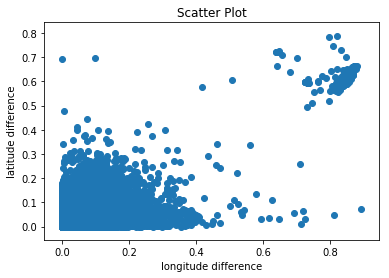

In [39]:
long = train_df['longitude_difference']
lat = train_df['latitude_difference']
plt.scatter(long, lat)
plt.xlabel("longitude difference")
plt.ylabel("latitude difference")
plt.title("Scatter Plot")
plt.show()

### Histogram to understand the ride distances in km

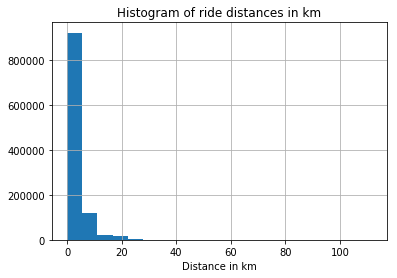

count    1.081003e+06
mean     3.327412e+00
std      3.761246e+00
min      0.000000e+00
25%      1.255100e+00
50%      2.154700e+00
75%      3.912400e+00
max      1.115052e+02
Name: euclidean_distance, dtype: float64

In [40]:
train_df['euclidean_distance'].hist(bins=20, figsize=(6,4))
plt.xlabel('Distance in km')
plt.title('Histogram of ride distances in km')
plt.show()
train_df['euclidean_distance'].describe()

### Average Cost per km

In [41]:
average = train_df['fare_amount'].sum()/train_df['euclidean_distance'].sum()
print("${:0.2f}".format(average))

$3.40


### Calculating Pearson Coefficients and displaying Scatter Plots between the features

(0.82137277426390887, 0.0)


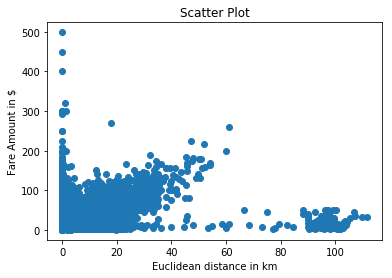

In [42]:
r1 = pearsonr(train_df['euclidean_distance'], train_df['fare_amount'])
print(r1)
fig = plt.scatter(train_df['euclidean_distance'], train_df['fare_amount'])
plt.xlabel('Euclidean distance in km')
plt.ylabel('Fare Amount in $')
plt.title('Scatter Plot')
plt.savefig('scatter_e_f.png', dpi=300, bbox_inches='tight')
plt.show()

(-0.026864595559522923, 9.6240298607141693e-172)


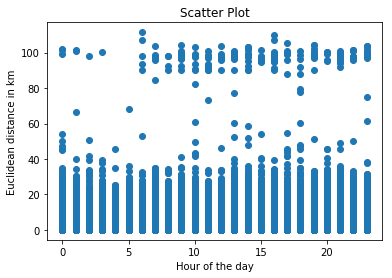

In [43]:
r2 = pearsonr(train_df['Hour'], train_df['euclidean_distance'])
print(r2)
fig = plt.scatter(train_df['Hour'], train_df['euclidean_distance'])
plt.xlabel('Hour of the day')
plt.ylabel('Euclidean distance in km')
plt.title('Scatter Plot')
plt.savefig('scatter_h_e.png', dpi=300, bbox_inches='tight')
plt.show()

(-0.01687642695929403, 6.1754169897242421e-69)


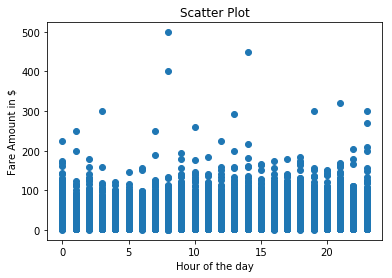

In [44]:
r3 = pearsonr(train_df['Hour'], train_df['fare_amount'])
print(r3)
fig = plt.scatter(train_df['Hour'], train_df['fare_amount'])
plt.xlabel('Hour of the day')
plt.ylabel('Fare Amount in $')
plt.title('Scatter Plot')
plt.savefig('scatter_h_f.png', dpi=300, bbox_inches='tight')
plt.show()

### Pair wise plots between distance, fare amount and time of day

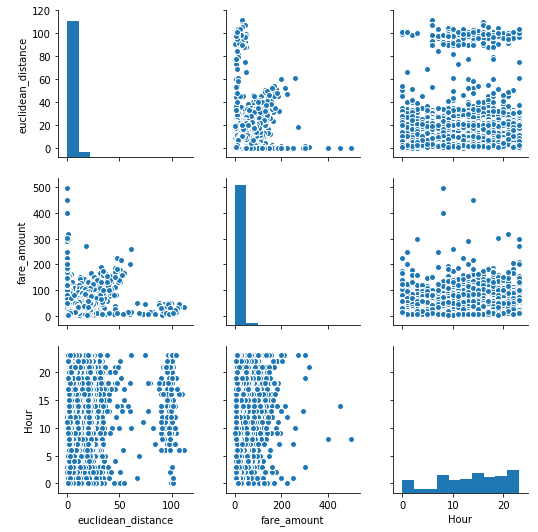

In [45]:
sns.pairplot(train_df, vars=['euclidean_distance', 'fare_amount', 'Hour'])
plt.show()

In [46]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_difference,latitude_difference,euclidean_distance,Hour,DayofWeek,Date,Month,Year,JFK,LGA,EWR
0,2010-06-04 14:49:00.000000100,5.7,2010-06-04 14:49:00,-73.9935,40.7614,-73.9797,40.7596,5,0.0138,0.0018,1.1794,14,4,4,6,2010,0,1,0
1,2012-12-06 18:05:00.000000201,35.0,2012-12-06 18:05:00,-73.9533,40.7878,-73.9444,40.7198,2,0.0089,0.0680,7.5983,18,3,6,12,2012,0,1,0
2,2014-07-20 12:48:35.0000001,17.0,2014-07-20 12:48:35,-73.9734,40.7439,-73.9540,40.7661,1,0.0194,0.0222,2.9604,12,6,20,7,2014,0,1,0
3,2013-05-10 16:39:08.0000001,5.0,2013-05-10 16:39:08,-73.9717,40.7634,-73.9620,40.7766,1,0.0097,0.0132,1.6798,16,4,10,5,2013,0,1,0
4,2010-05-17 07:44:00.00000096,17.3,2010-05-17 07:44:00,-73.9510,40.7856,-74.0102,40.7203,1,0.0592,0.0653,8.8085,7,0,17,5,2010,0,1,0


(0.013979550588358652, 7.2276255710529722e-48)


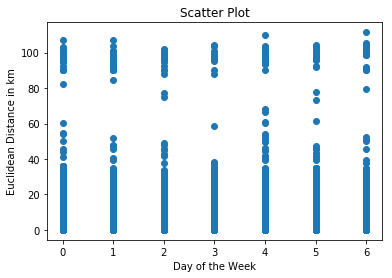

In [47]:
r4 = pearsonr(train_df['DayofWeek'], train_df['euclidean_distance'])
print(r4)
fig = plt.scatter(train_df['DayofWeek'], train_df['euclidean_distance'])
plt.xlabel('Day of the Week')
plt.ylabel('Euclidean Distance in km')
plt.title('Scatter Plot')
plt.savefig('scatter_d_e.png', dpi=300, bbox_inches='tight')
plt.show()

(0.0110150427890108, 2.2762669625863405e-30)


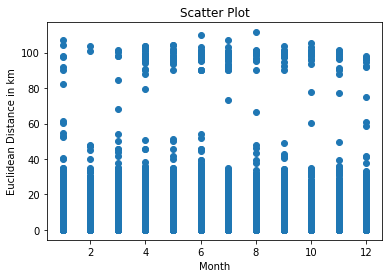

In [48]:
r5 = pearsonr(train_df['Month'], train_df['euclidean_distance'])
print(r5)
fig = plt.scatter(train_df['Month'], train_df['euclidean_distance'])
plt.xlabel('Month')
plt.ylabel('Euclidean Distance in km')
plt.title('Scatter Plot')
plt.savefig('scatter_m_e.png', dpi=300, bbox_inches='tight')
plt.show()

(0.011334821266965922, 4.646229085071953e-32)


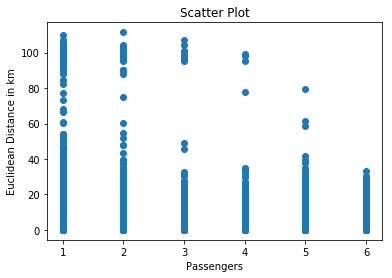

In [49]:
r6 = pearsonr(train_df['passenger_count'], train_df['euclidean_distance'])
print(r6)
fig = plt.scatter(train_df['passenger_count'], train_df['euclidean_distance'])
plt.xlabel('Passengers')
plt.ylabel('Euclidean Distance in km')
plt.title('Scatter Plot')
plt.savefig('scatter_p_e.png', dpi=300, bbox_inches='tight')
plt.show()

### Histogram for time of the day to see at what time people travel the most

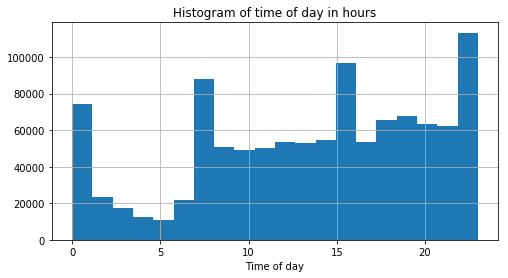

count    1.081003e+06
mean     1.351270e+01
std      6.511843e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.400000e+01
75%      1.900000e+01
max      2.300000e+01
Name: Hour, dtype: float64

In [50]:
train_df['Hour'].hist(bins=20, figsize=(8,4))
plt.xlabel('Time of day')
plt.title('Histogram of time of day in hours')
plt.savefig('histogram_hour.png', dpi=300, bbox_inches='tight')
plt.show()
train_df['Hour'].describe()

### Looking at the monthly fare amount stats for discovering any insights. There is not much variation in the (fare/distance) value for each month

In [51]:
groupYear = train_df.groupby('Month')
print("Fare Amount stats for every month")
print(groupYear['fare_amount'].agg([np.mean, np.std]))
print("Euclidean Distance stats for every month")
print(groupYear['euclidean_distance'].agg([np.mean, np.std]))

Fare Amount stats for every month
            mean        std
Month                      
1      10.737824   9.199586
2      10.897854   9.107107
3      11.214469   9.598458
4      11.283940   9.442737
5      11.565983   9.984568
6      11.564703  10.011292
7      11.053402   9.258301
8      11.276484   9.614561
9      11.649389   9.828190
10     11.567957   9.652414
11     11.554610   9.754402
12     11.590434   9.800676
Euclidean Distance stats for every month
           mean       std
Month                    
1      3.171622  3.543331
2      3.184846  3.445456
3      3.313360  3.641305
4      3.336896  3.837351
5      3.392196  3.843050
6      3.398098  3.957259
7      3.360994  3.927255
8      3.433227  3.853607
9      3.354170  3.781881
10     3.350112  3.820467
11     3.337160  3.742640
12     3.314705  3.720913


### Looking at the yearly fare amount stats for discovering any insights. As expected each year, (fare/distance) value kept increasing, basically every year the fare increased.

In [52]:
groupYear = train_df.groupby('Year')
print("Fare Amount stats for every year")
print(groupYear['fare_amount'].agg([np.mean, np.std]))
print("Euclidean Distance stats for every year")
print(groupYear['euclidean_distance'].agg([np.mean, np.std]))

Fare Amount stats for every year
           mean        std
Year                      
2009  10.067120   8.129213
2010  10.158196   8.352970
2011  10.429700   8.697857
2012  11.178447   9.432274
2013  12.549409  10.507285
2014  12.848891  10.896084
2015  12.972759  11.382638
Euclidean Distance stats for every year
          mean       std
Year                    
2009  3.229155  4.187942
2010  3.232940  3.782314
2011  3.290146  3.505681
2012  3.376505  3.620130
2013  3.392727  3.672575
2014  3.402513  3.718453
2015  3.413814  3.860215


### Heatmap for seeing correlation between all the features

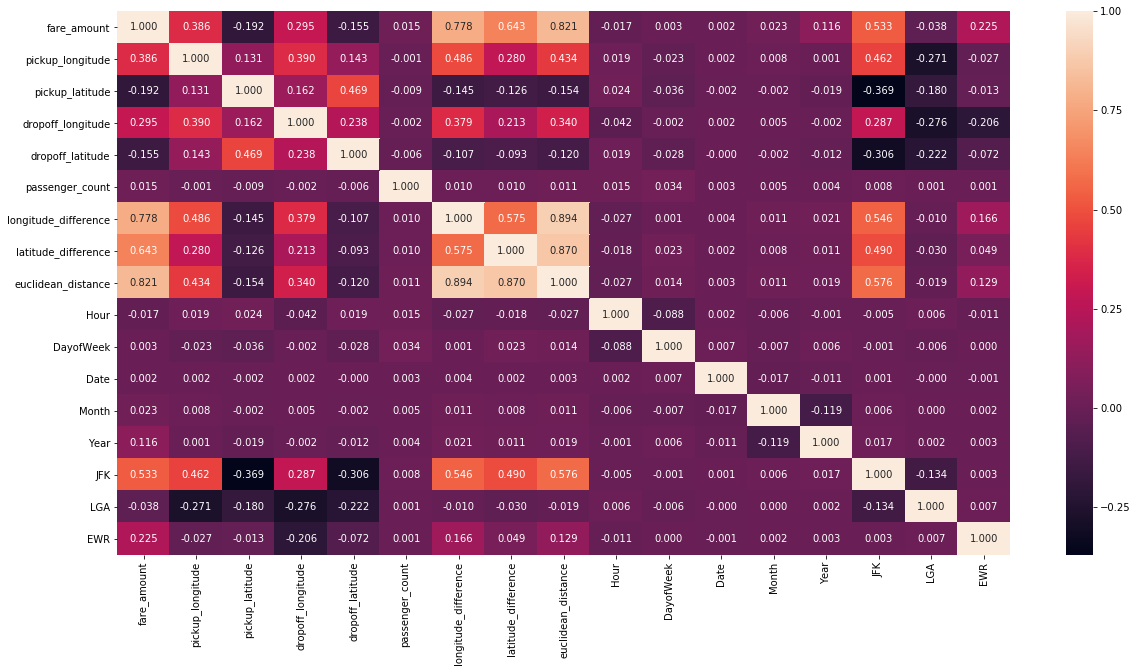

In [53]:
plt.figure(figsize=(20,10))
train_corr = train_df.drop(['key','pickup_datetime'],axis=1).corr()
sns.heatmap(train_corr,annot=True,fmt='0.3f')
plt.show()

### Creating final features (X) and fare_amount (Y) for modelling

In [54]:
X = train_df.drop(['key','fare_amount','pickup_datetime','longitude_difference','latitude_difference'],axis=1)
Y = train_df.loc[:,'fare_amount']

### Standardizing the features by making mean = 0 and variance = 1

In [55]:
X = StandardScaler().fit_transform(X)
X.shape

(1081003, 14)

### Splitting X into training (80%) and validation sets (20%)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Linear Regression Model

In [57]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

print("Training data score")
print(lr.score(X_train,Y_train))

print("Validation data score")
print(lr.score(X_test,Y_test))

Training data score
0.711101626281
Validation data score
0.724325613414


### Coefficients of Linear Regression

In [58]:
lr.coef_

array([ 0.41218807, -0.5990123 ,  0.65286071, -0.41482799,  0.05456024,
        6.90520624,  0.07616394, -0.09277582,  0.00988896,  0.24581987,
        0.99107821,  0.38984153, -0.10229442,  1.37062313])

### Calculating various evaluation metrics

In [59]:
Y_pred = lr.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
mae = metrics.mean_absolute_error(Y_test, Y_pred)
evs = metrics.explained_variance_score(Y_test, Y_pred)
r2 = metrics.r2_score(Y_test, Y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("EVS", evs)
print("R2 Score", r2)

RMSE 5.01966375806
MAE 2.4326463711
EVS 0.724328026881
R2 Score 0.724325613414


### Preparing the final test data by standardizing the features by making mean = 0 and variance = 1

In [60]:
real_test = test_df.drop(['key', 'pickup_datetime','longitude_difference','latitude_difference'], axis=1)
print(real_test.head())
real_test = StandardScaler().fit_transform(real_test)

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0          -73.9733          40.7638           -73.9814           40.7438   
1          -73.9869          40.7194           -73.9989           40.7392   
2          -73.9825          40.7513           -73.9797           40.7461   
3          -73.9812          40.7678           -73.9904           40.7516   
4          -73.9660          40.7898           -73.9886           40.7444   

   passenger_count  euclidean_distance  Hour  DayofWeek  Date  Month  Year  \
0                1              2.3262    13          1    27      1  2015   
1                1              2.4228    13          1    27      1  2015   
2                1              0.6245    11          5     8     10  2011   
3                1              1.9609    21          5     1     12  2012   
4                1              5.3951    21          5     1     12  2012   

   JFK  LGA  EWR  
0    0    1    0  
1    0    1    0  
2    0    1

### Making predictions on test data (linear regression)

In [61]:
final_pred = lr.predict(real_test)
final_pred = np.round(final_pred, decimals=2)

In [62]:
print(final_pred)

[ 10.39  10.98   5.8  ...,  47.17  21.17   7.92]


### Writing predictions to submission file

In [63]:
linear_regression_predictions = pd.DataFrame({"key": test_df['key'],"fare_amount": final_pred},columns = ['key','fare_amount'])

In [64]:
linear_regression_predictions.to_csv('linear_regression_submission_5.csv',index=False)

### Random Forest Regression Model

In [65]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

print("Training data score")
print(rf.score(X_train,Y_train))

print("Validation data score")
print(rf.score(X_test,Y_test))

Training data score
0.968763928693
Validation data score
0.834779759798


### Printing the importance of each feature

In [66]:
print(rf.feature_importances_)

[  3.20028464e-02   2.50855308e-02   5.46289898e-02   3.17929305e-02
   3.88579235e-03   7.75268456e-01   1.60785356e-02   8.01478786e-03
   1.42090275e-02   1.13359894e-02   2.62277130e-02   6.02704985e-04
   4.92837173e-04   3.73859169e-04]


### Calculating various evaluation metrics

In [67]:
Y_pred = rf.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
mae = metrics.mean_absolute_error(Y_test, Y_pred)
evs = metrics.explained_variance_score(Y_test, Y_pred)
r2 = metrics.r2_score(Y_test, Y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("EVS", evs)
print("R2 Score", r2)

RMSE 3.88604694809
MAE 1.82340934131
EVS 0.834868539773
R2 Score 0.834779759798


### Making predictions on test data (random forest)

In [68]:
final_pred = rf.predict(real_test)
final_pred = np.round(final_pred, decimals=2)
print(final_pred)

[  9.3   10.65   4.58 ...,  55.19  20.6    6.85]


### Writing predictions to submission file

In [69]:
random_forest_predictions = pd.DataFrame({"key": test_df['key'],"fare_amount": final_pred},columns = ['key','fare_amount'])

In [70]:
random_forest_predictions.to_csv('random_forest_submission_4.csv',index=False)

### Parameters for xgboost model

In [71]:
params = {
    'max_depth': 6,
    'gamma' :0,
    'eta':.03, 
    'subsample': 1,
    'colsample_bytree': 0.9, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0
}

### xgboost model training

In [72]:
def XGBmodel(x_train, x_test, y_train, y_test, params):
    matrix_train = xgb.DMatrix(x_train, label=y_train)
    matrix_test = xgb.DMatrix(x_test, label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=5000, 
                    early_stopping_rounds=5,evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train, X_test, Y_train, Y_test, params)

[0]	test-rmse:14.0421
Will train until test-rmse hasn't improved in 5 rounds.
[1]	test-rmse:13.6588
[2]	test-rmse:13.2883
[3]	test-rmse:12.9294
[4]	test-rmse:12.5827
[5]	test-rmse:12.2474
[6]	test-rmse:11.9233
[7]	test-rmse:11.6114
[8]	test-rmse:11.3096
[9]	test-rmse:11.0373
[10]	test-rmse:10.7533
[11]	test-rmse:10.479
[12]	test-rmse:10.2142
[13]	test-rmse:9.95885
[14]	test-rmse:9.71199
[15]	test-rmse:9.47408
[16]	test-rmse:9.24504
[17]	test-rmse:9.02365
[18]	test-rmse:8.80981
[19]	test-rmse:8.60323
[20]	test-rmse:8.40419
[21]	test-rmse:8.21302
[22]	test-rmse:8.02829
[23]	test-rmse:7.85025
[24]	test-rmse:7.67946
[25]	test-rmse:7.51501
[26]	test-rmse:7.35674
[27]	test-rmse:7.20433
[28]	test-rmse:7.06606
[29]	test-rmse:6.92447
[30]	test-rmse:6.78853
[31]	test-rmse:6.65764
[32]	test-rmse:6.53228
[33]	test-rmse:6.41162
[34]	test-rmse:6.29575
[35]	test-rmse:6.18461
[36]	test-rmse:6.07813
[37]	test-rmse:5.97633
[38]	test-rmse:5.87911
[39]	test-rmse:5.7912
[40]	test-rmse:5.70143
[41]	test-rms

[345]	test-rmse:3.71523
[346]	test-rmse:3.71485
[347]	test-rmse:3.71401
[348]	test-rmse:3.71368
[349]	test-rmse:3.71343
[350]	test-rmse:3.71339
[351]	test-rmse:3.71298
[352]	test-rmse:3.71272
[353]	test-rmse:3.71227
[354]	test-rmse:3.71168
[355]	test-rmse:3.71159
[356]	test-rmse:3.71084
[357]	test-rmse:3.71079
[358]	test-rmse:3.71062
[359]	test-rmse:3.71031
[360]	test-rmse:3.71018
[361]	test-rmse:3.70986
[362]	test-rmse:3.71002
[363]	test-rmse:3.70972
[364]	test-rmse:3.7094
[365]	test-rmse:3.70935
[366]	test-rmse:3.70835
[367]	test-rmse:3.70795
[368]	test-rmse:3.7077
[369]	test-rmse:3.70778
[370]	test-rmse:3.70758
[371]	test-rmse:3.70752
[372]	test-rmse:3.70734
[373]	test-rmse:3.7062
[374]	test-rmse:3.70615
[375]	test-rmse:3.70492
[376]	test-rmse:3.70474
[377]	test-rmse:3.70461
[378]	test-rmse:3.70447
[379]	test-rmse:3.7042
[380]	test-rmse:3.70415
[381]	test-rmse:3.70287
[382]	test-rmse:3.70291
[383]	test-rmse:3.70299
[384]	test-rmse:3.70289
[385]	test-rmse:3.7019
[386]	test-rmse:3.701

### xgboost predictions on test set

In [73]:
xg_pred = model.predict(xgb.DMatrix(real_test), ntree_limit = model.best_ntree_limit)
xg_pred = [float(i) for i in xg_pred]
xg_pred = np.round(xg_pred, decimals=2)
print(xg_pred)

[ 10.73  10.97   5.1  ...,  50.3   19.74   6.94]


In [74]:
xgboost_predictions = pd.DataFrame({"key": test_df['key'],"fare_amount": xg_pred},columns = ['key','fare_amount'])

In [75]:
xgboost_predictions.to_csv('xgboost_submission_4.csv',index=False)

### Light GBM model

In [76]:
model = lgb.LGBMRegressor(objective='regression')
model.fit(X_train, Y_train)

lgb_predictions = model.predict(X_test)
lgb_predictions = np.round(lgb_predictions, decimals=2)
print(lgb_predictions)

lgb_error = np.sqrt(metrics.mean_squared_error(Y_test, lgb_predictions))
print(lgb_error)

[ 10.06   5.3   19.77 ...,  10.68   5.35  14.47]
3.75071377687


### lgbm predictions

In [77]:
lgbm_pred = model.predict(real_test)
lgbm_pred = np.round(lgbm_pred, decimals=2)

In [78]:
lgbm_predictions = pd.DataFrame({"key": test_df['key'],"fare_amount": lgbm_pred},columns = ['key','fare_amount'])

In [79]:
lgbm_predictions.to_csv('lgbm_submission_3.csv',index=False)

### Ensemble of xgboost 50% and lgbm 50%

In [80]:
lgbm_pred = [i*0.5 for i in lgbm_pred]
xg_pred = [i*0.5 for i in xg_pred]
ensemble_predictions = [x + y for x, y in zip(lgbm_pred, xg_pred)]
ensemble_predictions = np.round(ensemble_predictions, decimals=2)
print(ensemble_predictions)

[ 10.83  10.92   5.01 ...,  50.16  19.66   6.92]


In [81]:
ensemble = pd.DataFrame({"key": test_df['key'],"fare_amount": ensemble_predictions},columns = ['key','fare_amount'])

In [82]:
ensemble.to_csv('ensemble_submission_4.csv',index=False)

### Ensemble of xgboost 75% and lgbm 25%

In [83]:
lgbm_pred = [2*i*0.25 for i in lgbm_pred]
xg_pred = [2*i*0.75 for i in xg_pred]
ensemble_predictions = [x + y for x, y in zip(lgbm_pred, xg_pred)]
ensemble_predictions = np.round(ensemble_predictions, decimals=2)
print(ensemble_predictions)

[ 10.78  10.95   5.06 ...,  50.23  19.7    6.93]


In [84]:
ensemble2 = pd.DataFrame({"key": test_df['key'],"fare_amount": ensemble_predictions},columns = ['key','fare_amount'])

In [85]:
ensemble2.to_csv('ensemble_submission_5.csv',index=False)